**Supervised Classification: Decision**
**Trees, SVM, and Naive Bayes|**
**Assignment**


**Question 1 : What is Information Gain, and how is it used in Decision Trees?**

Information Gain (IG) is a metric used in decision tree algorithms (like ID3, C4.5, and CART) to measure how well a given feature separates the training examples according to their target classes. It is based on the concept of entropy from information theory, which measures the amount of uncertainty or impurity in a dataset.

a.* Entropy*:

Entropy quantifies the impurity or randomness in the data. It is calculated as:


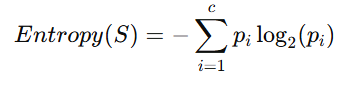

Where:

𝑆= current dataset

𝑐= number of classes

𝑝
𝑖= proportion of examples belonging to class


A higher entropy means the data is more impure (mixed), while lower entropy means it is purer (more homogeneous).

*b. Information Gain:*

Information Gain measures the reduction in entropy achieved by splitting the dataset based on a particular attribute.

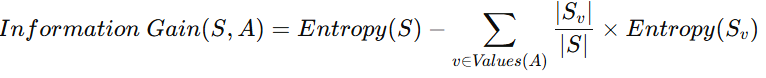

Where:

𝐴= attribute used for splitting

𝑆
𝑣= subset of

S=for which attribute
𝐴 has value
𝑣


∣
𝑆
𝑣
∣
/
∣
𝑆
∣ = proportion of samples in subset
𝑆
𝑣

*c. Use in Decision Trees:*

During the construction of a decision tree, the algorithm calculates the Information Gain for each available attribute.

The attribute that gives the highest Information Gain is selected as the splitting attribute at that node.

This process is repeated recursively for each branch until the data is perfectly classified or another stopping criterion is met (like maximum depth or minimum samples per node).

*d. Example:*

Suppose we want to predict whether a person will play tennis based on attributes like “Outlook,” “Temperature,” and “Humidity.”
If splitting on “Outlook” reduces the entropy the most, then “Outlook” will be chosen as the root node because it provides the maximum Information Gain.

**Question 2: What is the difference between Gini Impurity and Entropy?**

**Hint: Directly compares the two main impurity measures, highlighting strengths,**
**weaknesses, and appropriate use cases.**


Gini Impurity and Entropy are two common measures used to evaluate the impurity or disorder of a dataset in decision tree algorithms. Both determine how mixed the classes are within a node, but they differ slightly in their calculation and interpretation.

| **Aspect**      | **Gini Impurity**                                                              | **Entropy**                                                      |
| --------------- | ------------------------------------------------------------------------------ | ---------------------------------------------------------------- |
| **Definition**  | Measures the probability of incorrectly classifying a randomly chosen element. | Measures the amount of uncertainty or randomness in the data.    |
| **Formula**     | ( G = 1 - \sum p_i^2 )                                                         | ( H = -\sum p_i \log_2(p_i) )                                    |
| **Value Range** | 0 (pure) to 0.5 (most impure for binary classes)                               | 0 (pure) to 1 (most impure for binary classes)                   |
| **Computation** | Simple and faster (no logarithms involved).                                    | Slightly slower due to logarithmic calculations.                 |
| **Sensitivity** | Less sensitive to small class probability changes.                             | More sensitive to class imbalance and small probability changes. |
| **Typical Use** | Used in **CART (Classification and Regression Trees)**.                        | Used in **ID3** and **C4.5** algorithms.                         |


**Question 3:What is Pre-Pruning in Decision Trees?**


Pre-pruning, also known as early stopping, is a technique used to prevent a decision tree from overfitting the training data by stopping the tree growth early, before it becomes too complex.

Instead of allowing the tree to grow fully and then trimming it (as in post-pruning), pre-pruning sets conditions or limits that stop further splitting of nodes during the tree-building process.

***Common Pre-Pruning Criteria:***

Minimum number of samples required to split a node.

Maximum depth of the tree.

Minimum information gain or Gini decrease required for a split.

Maximum number of leaf nodes.

Advantages:

***Reduces overfitting.***

Saves computation time and memory.

Produces simpler, more interpretable models.

***Disadvantages:***

May stop tree growth too early, leading to underfitting.

Sometimes misses useful splits that could improve accuracy later.

**Question 4:Write a Python program to train a Decision Tree Classifier using Gini**
**Impurity as the criterion and print the feature importances (practical).**

Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.
(Include your Python code and output in the code box below.)


In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876

Model Accuracy: 1.00


**Question 5: What is a Support Vector Machine (SVM)?**


A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the best boundary (hyperplane) that separates data points of different classes with the maximum margin.

In simple terms, SVM tries to draw a line (in 2D) or a plane (in higher dimensions) that clearly divides different classes while staying as far away as possible from the nearest data points of each class. These closest points are called support vectors, as they “support” or define the boundary.

***Hyperplane***: The decision boundary that separates the classes.

***Support Vectors:*** Data points that are closest to the hyperplane and influence its position.

***Margin:*** The distance between the hyperplane and the nearest data points of each class — SVM aims to maximize this margin.

***Kernel Trick:*** Allows SVM to perform classification on non-linear data by mapping it into higher-dimensional space (e.g., linear, polynomial, RBF kernels).

**Advantages:**

Effective in high-dimensional spaces.

Works well with clear margin separation.

Can handle both linear and non-linear classification using kernels.

**Disadvantages:**

Computationally expensive for large datasets.

Choosing the right kernel and parameters can be challenging.

**Question 6: What is the Kernel Trick in SVM?**

The Kernel Trick is a technique used in Support Vector Machines (SVM) to handle non-linearly separable data. It allows SVM to compute in a higher-dimensional feature space without explicitly transforming the data into that space.

In many real-world problems, data cannot be separated by a straight line (or hyperplane).

SVM can map the original input features into a higher-dimensional space where a linear separation is possible.

The kernel function calculates the inner product in this higher-dimensional space implicitly, saving computation time.

| **Kernel**                      | **Description**                                                                |
| ------------------------------- | ------------------------------------------------------------------------------ |
| **Linear**                      | No transformation, works for linearly separable data.                          |
| **Polynomial**                  | Maps data into polynomial feature space (e.g., quadratic or cubic).            |
| **RBF (Radial Basis Function)** | Maps data into infinite-dimensional space, very flexible for complex patterns. |
| **Sigmoid**                     | Similar to a neural network activation function, less commonly used.           |


**Advantages:**

Enables SVM to solve non-linear classification problems efficiently.

Avoids explicitly computing high-dimensional transformations.

**Question 7: Write a Python program to train two SVM classifiers with Linear and** **RBF kernels on the Wine dataset, then compare their accuracies.**


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the accuracies
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.2f}")


Accuracy of SVM with Linear Kernel: 0.98
Accuracy of SVM with RBF Kernel: 0.76


**Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

The Naïve Bayes classifier is a probabilistic machine learning algorithm used for classification tasks. It is based on Bayes’ Theorem, which calculates the probability of a class given certain features.

Bayes’ Theorem:

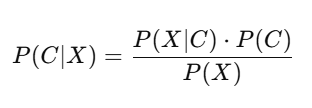

Where:


P(C∣X) = Probability of class
𝐶
given features
𝑋

P(X∣C) = Probability of features
𝑋
 given class
𝐶

P(C) = Prior probability of class
𝐶


P(X) = Probability of features
𝑋

***Why is it called "Naïve"?***

The classifier is called “naïve” because it assumes that all features are independent of each other, even though in real-world data, features are often correlated. This simplification makes computations much easier and faster, but it is a strong and often unrealistic assumption.

**Advantages:**

Simple and easy to implement.

Works well with large datasets.

Effective for text classification (spam detection, sentiment analysis).

**Disadvantages:**

Assumes feature independence, which may not hold in practice.

Performance can degrade if features are strongly correlated.

**Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve**
**Bayes, and Bernoulli Naïve Bayes**


| **Variant**                 | **Data Type / Feature Type** | **Description**                                                                                                                                                | **Use Cases**                                                                        |
| --------------------------- | ---------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| **Gaussian Naïve Bayes**    | Continuous numeric data      | Assumes features follow a **normal (Gaussian) distribution**. The likelihood of the features is computed using the probability density function of a Gaussian. | Predicting numeric measurements, e.g., iris dataset, sensor data.                    |
| **Multinomial Naïve Bayes** | Discrete count data          | Assumes features represent **counts or frequencies** and models them using the multinomial distribution.                                                       | Text classification, document classification, spam detection (word counts).          |
| **Bernoulli Naïve Bayes**   | Binary / Boolean data        | Assumes features are **binary** (0 or 1, yes/no). Models whether a feature is present or absent.                                                               | Text classification using **presence/absence of words**, e.g., email spam detection. |


***Key Differences:***

**Distribution Assumption:**

-Gaussian → continuous data, normal distribution.

-Multinomial → count/frequency data.

-Bernoulli → binary data.

**Feature Type:**

-Gaussian → real-valued features.

-Multinomial → integer counts.

-Bernoulli → binary features.

**Use Case:**

Gaussian → numeric datasets.

Multinomial → word counts or categorical counts.

Bernoulli → binary indicators (presence/absence).

**Question 10: Breast Cancer Dataset**
**Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast** **Cancer dataset and evaluate accuracy.**
Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from
sklearn.datasets.
(Include your Python code and output in the code box below.)

In [ ]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.2f}")


Accuracy of Gaussian Naive Bayes: 0.94
